In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

# 三大栄養の必要最低限量

## 参考文献

TDEE計算  
https://calculator-online.net/ja/tdee-calculator/ (2022/4/18)

三大栄養素のバランス（農林水産省）  
https://www.maff.go.jp/j/syokuiku/wakaisedai/attach/pdf/balance-8.pdf (2022/4/18)

食品成分データベース（文部科学省）  
https://fooddb.mext.go.jp/index.pl (2022/4/18)

必要たんぱく質量の参考（厚生労働省）  
https://www.mhlw.go.jp/file/05-Shingikai-10901000-Kenkoukyoku-Soumuka/0000042630.pdf (2022/4/18)

必要炭水化物量の参考（厚生労働省）  
https://www.mhlw.go.jp/file/05-Shingikai-10901000-Kenkoukyoku-Soumuka/0000042632.pdf (2022/4/18)  

https://www.mhlw.go.jp/content/10904750/000586559.pdf (2022/4/18)

必要脂質量の参考（農林水産省）  
https://www.mhlw.go.jp/file/05-Shingikai-10901000-Kenkoukyoku-Soumuka/0000042631.pdf (2022/4/18)

## 必要カロリーの計算

### BMR, TEDDでのカロリー計算  
BMR = (cm × 6.25) + (kg × 9.99) - (年齢 × 4.92) + 5  
TDEE = BMR × アクティブレベル

アクティブレベル係数  
level_0 めったに運動しない：1.200  
level_1 週に1～3日の運動：1.375  
level_2 週に3～5日の運動：1.550  
level_3 週に6～7日の運動：1.725  
level_4 物理的な仕事，1日2回の運動：1.900  
と設定した。

In [2]:
#自己データ
height = 171
weight = 66
age = 25

In [3]:
#BMR(基礎代謝量)の算出
BMR = (height * 6.25) + (weight * 9.99) - (age * 4.92) + 5
print("BMR：基礎代謝量")
print("BMR", round(BMR, 1))

#アクティブレベル
level = {"TDEE_level_0": 1.200,
         "TDEE_level_1": 1.375, 
         "TDEE_level_2": 1.550, 
         "TDEE_level_3": 1.725, 
         "TDEE_level_4": 1.900}
TDEE_all = []

#TDEE(活動代謝量)の算出
print("TDEE：活動代謝量")
for i, j in level.items():
    TDEE = BMR * j
    TDEE_all.append(TDEE)
    print(i, round(TDEE, 1), sep=" - ")
    
#level = {0:1.200, 1:1.375, 2:1.550, 3:1.725, 4:1.900}
#level = np.array([1.200, 1.375, 1.550, 1.725, 1.900])
#TDEE = BMR * level   
#np.set_printoptions(precision=1, suppress=True)
#print("TDEE", TDEE)

BMR：基礎代謝量
BMR 1610.1
TDEE：活動代謝量
TDEE_level_0 - 1932.1
TDEE_level_1 - 2213.9
TDEE_level_2 - 2495.6
TDEE_level_3 - 2777.4
TDEE_level_4 - 3059.2


In [4]:
TDEE_all

[1932.1080000000002,
 2213.87375,
 2495.6395,
 2777.4052500000003,
 3059.1710000000003]

## カロリーからの栄養バランスの計算

三大栄養素のバランス（農林水産省より）  
炭水化物：50～60％  
脂質：20～30%％  
タンパク質：13～20％  

In [5]:
#carbo = 60 / 100
#fat = 20 / 100
#protein = 20 / 100

#小数点第二位で四捨五入，指数表記なし にする
#np.set_printoptions(precision=1, suppress=True)

balance = {"carbo": 0.6,
           "fat": 0.2,
           "protein": 0.2}

balance_kcal = []
for i, j in balance.items():
    kcal = j * np.array(TDEE_all)
    
    balance_kcal.append(np.round(kcal, 1))

balance_kcal

[array([1159.3, 1328.3, 1497.4, 1666.4, 1835.5]),
 array([386.4, 442.8, 499.1, 555.5, 611.8]),
 array([386.4, 442.8, 499.1, 555.5, 611.8])]

In [6]:
df_balance_kcal = pd.DataFrame(balance_kcal)
df_balance_kcal

,0,1,2,3,4
0,1159.3,1328.3,1497.4,1666.4,1835.5
1,386.4,442.8,499.1,555.5,611.8
2,386.4,442.8,499.1,555.5,611.8


In [7]:
#レコード名，カラム名の一括変更
df_balance_kcal = df_balance_kcal.set_axis([i for i in balance.keys()], axis="index")
df_balance_kcal = df_balance_kcal.set_axis([i for i in level.keys()], axis="columns")
df_balance_kcal

,TDEE_level_0,TDEE_level_1,TDEE_level_2,TDEE_level_3,TDEE_level_4
carbo,1159.3,1328.3,1497.4,1666.4,1835.5
fat,386.4,442.8,499.1,555.5,611.8
protein,386.4,442.8,499.1,555.5,611.8


## 炭水化物，脂質，タンパク質の必要最低限量

### 炭水化物

脳は体重の 2％ 程度の重量であるが、その個体の基礎代謝量の約 20％ を消費すると考えられてい
る 5）。仮に基礎代謝量を 1,500 kcal/日とすれば、脳のエネルギー消費量は 300 kcal/日になり、こ
れはぶどう糖 75 g/日に相当する。上記のように脳以外の組織もぶどう糖をエネルギー源として利
用することから、ぶどう糖の必要量は少なくとも 100 g/日と推定され、すなわち、消化性炭水化
物の最低必要量はおよそ 100 g/日と推定される。  
https://www.mhlw.go.jp/file/05-Shingikai-10901000-Kenkoukyoku-Soumuka/0000042632.pdf (2022/4/18)  

炭水化物：1g = 4kcal  
脳の必要消費量とブドウ糖の比率：100kcal:25g(1kcal:0.25g)  
ブドウ糖：100g(1g) は，炭水化物：91g(0.91g)

In [8]:
brain = weight * 0.02
brain_kcal = BMR * 0.2
brain_glucose = brain_kcal * 0.25
brain_carbo = brain_glucose * (100 / 91)
carbo_requirement = brain_glucose * (4 / 3)
carbo_requirement

107.33933333333334

### タンパク質

良質（動物性）たんぱく質の窒素出納維持量を検討した 17 の研究 14─28）の値を平均するとたん
ぱく質維持必要量は 0.65 g/kg 体重/日（104 mg 窒素/kg 体重/日）となる。この値をもってたんぱ
く質維持必要量とした（表 1）。  
　女性（12 人）で日常食混合たんぱく質の消化率を実測した研究では、平均で 92.2％ と報告され
ている 19）。また、男性（6 人）について測定した結果は 95.4％ であった 29）。これらより、日常食
混合たんぱく質の消化率は 90％ とし、以下の式で推定平均必要量を算定した。推奨量は、個人間
の変動係数を 12.5％ と見積もり、推定平均必要量に推奨量算定係数 1.25 を乗じた値とした。  
推定平均必要量算定の参照値（g/kg 体重/日）＝たんぱく質維持必要量÷消化率＝0.65÷0.90＝0.72  
推定平均必要量（g/日）＝推定平均必要量算定の参照値（g/kg 体重/日）×参照体重（kg）  
推奨量（g/日）＝推定平均必要量（g/日）×推奨量算定係数  
https://www.mhlw.go.jp/file/05-Shingikai-10901000-Kenkoukyoku-Soumuka/0000042630.pdf (2022/4/18)

In [9]:
protein_mean_reference = 0.65 * (100 / 90)
protein_mean_requirement = protein_mean_reference * weight
protein_requirement = protein_mean_requirement * 1.25
protein_requirement

59.58333333333334

### 脂質

脂質は，下記２つの理由により０とする  
・アルコール類に脂質が入ってしない（入っていたとしても微小）。  
・脂質の必要最低限量の記述がなかった。

In [10]:
fat_requirment = 0

# アルコール類のデータ抽出

In [11]:
#文部科学省の食品成分データベースからCSVで取得
df_alcohol = pd.read_csv("alcohol.csv")
df_alcohol.head()

,食品成分,廃棄率,エネルギー,水分,たんぱく質,脂質,炭水化物,灰分,食塩相当量,アルコール,重量,削除,単位
0,NaN,%,kcal,g,g,g,g,g,g,g,g,NaN,NaN
1,し好飲料類/＜アルコール飲料類＞/（醸造酒類）/清酒/普通酒,0,107,82.4,0.4,Tr,4.9,Tr,0,12.3,100,NaN,NaN
2,し好飲料類/＜アルコール飲料類＞/（醸造酒類）/清酒/純米酒,0,102,83.7,0.4,Tr,3.6,Tr,0,12.3,100,NaN,NaN
3,し好飲料類/＜アルコール飲料類＞/（醸造酒類）/清酒/本醸造酒,0,106,82.8,0.4,0,4.5,Tr,0,12.3,100,NaN,NaN
4,し好飲料類/＜アルコール飲料類＞/（醸造酒類）/清酒/吟醸酒,0,103,83.6,0.3,0,3.6,Tr,0,12.5,100,NaN,NaN


## 前処理

### 必要情報の抜き取り

In [12]:
#食品成分，エネルギー，たんぱく質，脂質，炭水化物 の抽出
df_alcohol = df_alcohol[["食品成分", "エネルギー", "たんぱく質", "脂質", "炭水化物","アルコール", "重量"]]
df_alcohol

,食品成分,エネルギー,たんぱく質,脂質,炭水化物,アルコール,重量
0,NaN,kcal,g,g,g,g,g
1,し好飲料類/＜アルコール飲料類＞/（醸造酒類）/清酒/普通酒,107,0.4,Tr,4.9,12.3,100
2,し好飲料類/＜アルコール飲料類＞/（醸造酒類）/清酒/純米酒,102,0.4,Tr,3.6,12.3,100
3,し好飲料類/＜アルコール飲料類＞/（醸造酒類）/清酒/本醸造酒,106,0.4,0,4.5,12.3,100
4,し好飲料類/＜アルコール飲料類＞/（醸造酒類）/清酒/吟醸酒,103,0.3,0,3.6,12.5,100
5,し好飲料類/＜アルコール飲料類＞/（醸造酒類）/清酒/純米吟醸酒,102,0.4,0,4.1,12.0,100
6,し好飲料類/＜アルコール飲料類＞/（醸造酒類）/ビール/淡色,39,0.3,0,3.1,3.7,100
7,し好飲料類/＜アルコール飲料類＞/（醸造酒類）/ビール/黒,45,0.4,Tr,3.6,4.2,100
8,し好飲料類/＜アルコール飲料類＞/（醸造酒類）/ビール/スタウト,62,0.5,Tr,4.9,5.9,100
9,し好飲料類/＜アルコール飲料類＞/（醸造酒類）/発泡酒,44,0.1,0,3.6,4.2,100


In [13]:
#Trは微小要素のため０とする
df_alcohol = df_alcohol.replace('Tr', 0)

#カラム名全体の後に任意の文字を追加
#df_alcohol = df_alcohol.add_suffix()

#カラム名の変更
#カラム名を第１カラム名に，１行目を第２カラム名に変更
#df_alcohol.columns = pd.MultiIndex.from_arrays( \
#                            [[i for i in df_alcohol.columns], \
#                             [i for i in df_alcohol.iloc[0]]])

#1行目の削除
df_alcohol = df_alcohol.dropna()
#TOTALの削除
df_alcohol = df_alcohol[df_alcohol["食品成分"] != "TOTAL"]

#食品成分の細分を抽出１
#idx = df_alcohol["食品成分"].str.rfind("/")+1
#for i in range(len(df_alcohol)):
#    df_alcohol["食品成分"][i+1] = df_alcohol["食品成分"][i+1][idx[i + 1]:]

#食品成分の細分を抽出２
df_alcohol["食品成分"] = df_alcohol["食品成分"].apply(lambda x: x.split("/")[-1])

df_alcohol

,食品成分,エネルギー,たんぱく質,脂質,炭水化物,アルコール,重量
1,普通酒,107,0.4,0,4.9,12.3,100
2,純米酒,102,0.4,0,3.6,12.3,100
3,本醸造酒,106,0.4,0,4.5,12.3,100
4,吟醸酒,103,0.3,0,3.6,12.5,100
5,純米吟醸酒,102,0.4,0,4.1,12.0,100
6,淡色,39,0.3,0,3.1,3.7,100
7,黒,45,0.4,0,3.6,4.2,100
8,スタウト,62,0.5,0,4.9,5.9,100
9,発泡酒,44,0.1,0,3.6,4.2,100
10,白,75,0.1,0,2.0,9.1,100


In [14]:
#食品成分列をインデックス名に変更
df_alcohol = df_alcohol.set_index('食品成分')
#文字列を数値（float型）に変換
df_alcohol = df_alcohol.astype(float)
df_alcohol.head()

,エネルギー,たんぱく質,脂質,炭水化物,アルコール,重量
食品成分,,,,,,
普通酒,107.0,0.4,0.0,4.9,12.3,100.0
純米酒,102.0,0.4,0.0,3.6,12.3,100.0
本醸造酒,106.0,0.4,0.0,4.5,12.3,100.0
吟醸酒,103.0,0.3,0.0,3.6,12.5,100.0
純米吟醸酒,102.0,0.4,0.0,4.1,12.0,100.0


### 前処理後データの表示(グラフ)

エネルギー


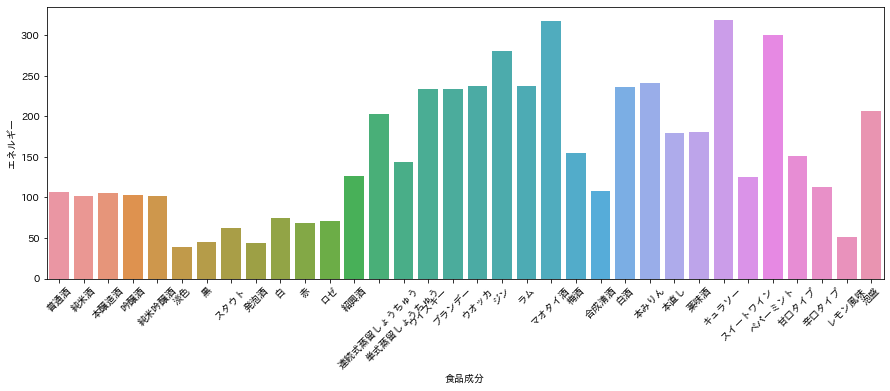

たんぱく質


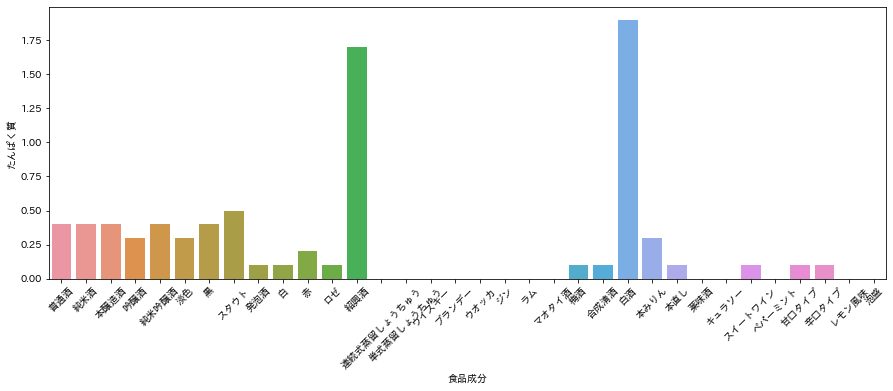

脂質


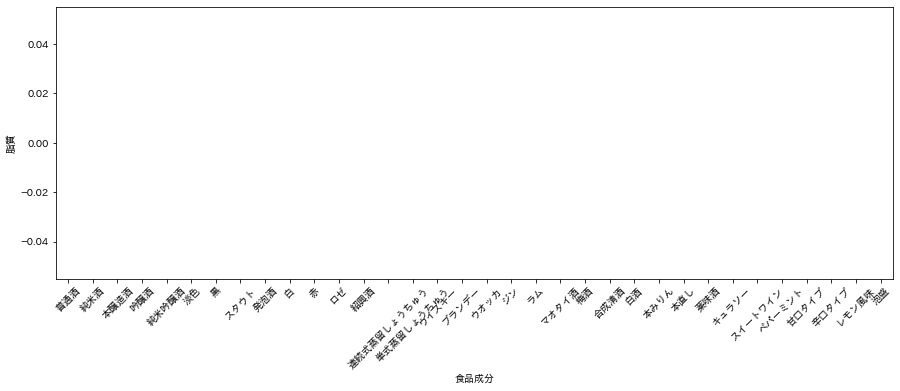

炭水化物


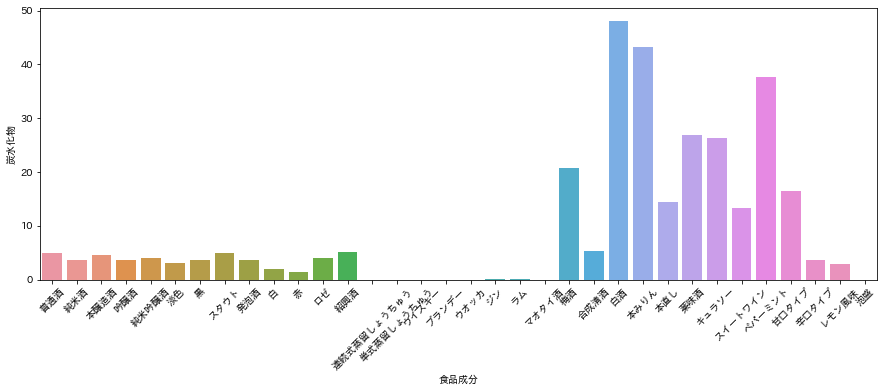

アルコール


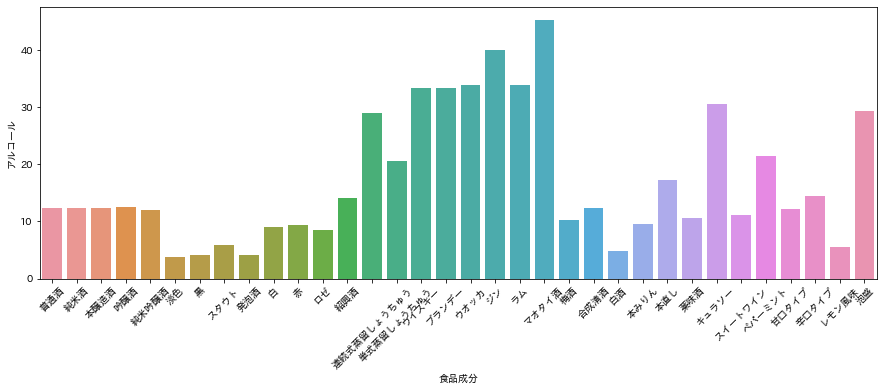

重量


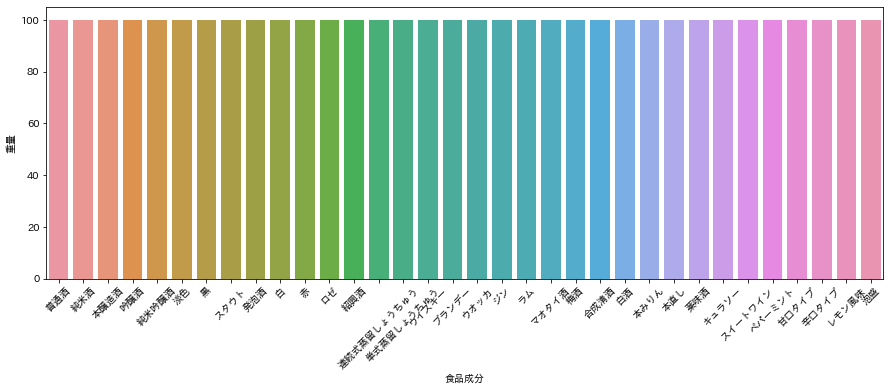

In [15]:
#サイズの設定
plt.rcParams['figure.figsize'] = (15 ,5)

#グラフの一括表示（繰り返し）
for i in df_alcohol.columns:
    #x軸に酒の種類，y軸に三大栄養素他
    sns.barplot(x=df_alcohol.index, y=i, data=df_alcohol)
    #x軸のフォントを45°回転
    plt.xticks(rotation=45)
    print(i)
    plt.show()

In [16]:
#重量１ｇあたりに変換
df_alcohol = np.round(df_alcohol / 100, 3)
df_alcohol

,エネルギー,たんぱく質,脂質,炭水化物,アルコール,重量
食品成分,,,,,,
普通酒,1.07,0.004,0.0,0.049,0.123,1.0
純米酒,1.02,0.004,0.0,0.036,0.123,1.0
本醸造酒,1.06,0.004,0.0,0.045,0.123,1.0
吟醸酒,1.03,0.003,0.0,0.036,0.125,1.0
純米吟醸酒,1.02,0.004,0.0,0.041,0.120,1.0
淡色,0.39,0.003,0.0,0.031,0.037,1.0
黒,0.45,0.004,0.0,0.036,0.042,1.0
スタウト,0.62,0.005,0.0,0.049,0.059,1.0
発泡酒,0.44,0.001,0.0,0.036,0.042,1.0


In [17]:
#最適化計算の計算式を考えるため転置した
df_alcohol_T = df_alcohol.T
df_alcohol_T

食品成分,普通酒,純米酒,本醸造酒,吟醸酒,純米吟醸酒,淡色,黒,スタウト,発泡酒,白,...,本みりん,本直し,薬味酒,キュラソー,スイートワイン,ペパーミント,甘口タイプ,辛口タイプ,レモン風味,泡盛
エネルギー,1.070,1.020,1.060,1.030,1.020,0.390,0.450,0.620,0.440,0.750,...,2.410,1.790,1.810,3.190,1.250,3.000,1.510,1.130,0.510,2.060
たんぱく質,0.004,0.004,0.004,0.003,0.004,0.003,0.004,0.005,0.001,0.001,...,0.003,0.001,0.000,0.000,0.001,0.000,0.001,0.001,0.000,0.000
脂質,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
炭水化物,0.049,0.036,0.045,0.036,0.041,0.031,0.036,0.049,0.036,0.020,...,0.432,0.144,0.268,0.264,0.134,0.376,0.164,0.037,0.029,0.000
アルコール,0.123,0.123,0.123,0.125,0.120,0.037,0.042,0.059,0.042,0.091,...,0.095,0.173,0.106,0.305,0.111,0.214,0.121,0.144,0.056,0.293
重量,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [18]:
#三大栄養素の必要最低限量の追加
df_alcohol_T = df_alcohol_T.loc[["たんぱく質", "脂質", "炭水化物"]]
#最適化に使用するデータのみ抽出
df_alcohol_T["必要量"] = np.round(np.array([protein_requirement, fat_requirment, carbo_requirement]), 1)
df_alcohol_T

食品成分,普通酒,純米酒,本醸造酒,吟醸酒,純米吟醸酒,淡色,黒,スタウト,発泡酒,白,...,本直し,薬味酒,キュラソー,スイートワイン,ペパーミント,甘口タイプ,辛口タイプ,レモン風味,泡盛,必要量
たんぱく質,0.004,0.004,0.004,0.003,0.004,0.003,0.004,0.005,0.001,0.001,...,0.001,0.000,0.000,0.001,0.000,0.001,0.001,0.000,0.0,59.6
脂質,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0
炭水化物,0.049,0.036,0.045,0.036,0.041,0.031,0.036,0.049,0.036,0.020,...,0.144,0.268,0.264,0.134,0.376,0.164,0.037,0.029,0.0,107.3


In [19]:
#前処理データの出力
df_alcohol_T.to_csv("alcohol_pre.csv")

# 最適化の実装

In [20]:
#PuLPを使用
import pulp
#変数の作成をしてくれる
from ortoolpy import addvars

## 線形計画問題（最小化）

### 最適化問題式

$$
    最小化： \\
    x_1+x_2+x_3+  ...  +x_{34} \quad(各酒量)\\
    \quad\\
    制約条件：\\
    0.004x_1+0.004x_2+0.004x_3+  ...  +0.001x_{34} \quad\geq 59.6\quad(たんぱく質)\\
    0x_1\quad+\quad0x_2\quad+\quad0x_3\quad+  ...  +\quad0x_{34} \quad\geq 0\quad(脂質)\\
    0.049x_1+0.036x_2+0.045x_3+  ...  +0.029x_{34} \quad\geq 107.3\quad(炭水化物)\\
$$

In [21]:
#線形計画問題（最小化）
prob = pulp.LpProblem("Alcohol", pulp.LpMinimize)

In [22]:
#制約条件の右辺
df_limit = df_alcohol_T["必要量"]
print(df_limit)
#制約条件の左辺
df_alcohol_prob = df_alcohol_T.iloc[:, :-1]

#行数，列数の取得
num_balance = len(df_alcohol_prob)
num_alcohol = len(df_alcohol_prob.columns)

df_alcohol_prob

たんぱく質     59.6
脂質         0.0
炭水化物     107.3
Name: 必要量, dtype: float64


食品成分,普通酒,純米酒,本醸造酒,吟醸酒,純米吟醸酒,淡色,黒,スタウト,発泡酒,白,...,本みりん,本直し,薬味酒,キュラソー,スイートワイン,ペパーミント,甘口タイプ,辛口タイプ,レモン風味,泡盛
たんぱく質,0.004,0.004,0.004,0.003,0.004,0.003,0.004,0.005,0.001,0.001,...,0.003,0.001,0.000,0.000,0.001,0.000,0.001,0.001,0.000,0.0
脂質,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0
炭水化物,0.049,0.036,0.045,0.036,0.041,0.031,0.036,0.049,0.036,0.020,...,0.432,0.144,0.268,0.264,0.134,0.376,0.164,0.037,0.029,0.0


## 変数の設定

In [23]:
#列数分の変数を設定
df_var = pd.DataFrame(addvars(1, num_alcohol))
df_var.columns = df_alcohol_prob.columns
df_var

食品成分,普通酒,純米酒,本醸造酒,吟醸酒,純米吟醸酒,淡色,黒,スタウト,発泡酒,白,...,本みりん,本直し,薬味酒,キュラソー,スイートワイン,ペパーミント,甘口タイプ,辛口タイプ,レモン風味,泡盛
0,v000001,v000002,v000003,v000004,v000005,v000006,v000007,v000008,v000009,v000010,...,v000025,v000026,v000027,v000028,v000029,v000030,v000031,v000032,v000033,v000034


In [24]:
#df_alcohol_prob.set_axis(range(34), axis=1)

In [25]:
#三大栄養素 × 変数
df_alcohol_prob * np.array(df_var)

食品成分,普通酒,純米酒,本醸造酒,吟醸酒,純米吟醸酒,淡色,黒,スタウト,発泡酒,白,...,本みりん,本直し,薬味酒,キュラソー,スイートワイン,ペパーミント,甘口タイプ,辛口タイプ,レモン風味,泡盛
たんぱく質,{v000001: 0.004},{v000002: 0.004},{v000003: 0.004},{v000004: 0.003},{v000005: 0.004},{v000006: 0.003},{v000007: 0.004},{v000008: 0.005},{v000009: 0.001},{v000010: 0.001},...,{v000025: 0.003},{v000026: 0.001},{},{},{v000029: 0.001},{},{v000031: 0.001},{v000032: 0.001},{},{}
脂質,{},{},{},{},{},{},{},{},{},{},...,{},{},{},{},{},{},{},{},{},{}
炭水化物,{v000001: 0.049},{v000002: 0.036},{v000003: 0.045},{v000004: 0.036},{v000005: 0.041},{v000006: 0.031},{v000007: 0.036},{v000008: 0.049},{v000009: 0.036},{v000010: 0.02},...,{v000025: 0.432},{v000026: 0.144},{v000027: 0.268},{v000028: 0.264},{v000029: 0.134},{v000030: 0.376},{v000031: 0.164},{v000032: 0.037},{v000033: 0.029},{}


## 制約条件の設定

In [26]:
#三大栄養素それぞれが必要量を満たす(大きくなる)ように条件付け
for i in range(num_balance):
    prob += pulp.lpSum(np.array(df_alcohol_prob.iloc[i]) * np.array(df_var)) >= df_limit[i]

## 目的関数の設定

In [27]:
prob.objective = pulp.lpSum(np.array(df_var))

## 最適化実行

In [28]:
status = prob.solve()
print("Status:", pulp.LpStatus[status])

Status: Optimal


## 最適化の結果

In [29]:
#線形計画問題（最小化）に関する情報
prob

Alcohol:
MINIMIZE
1*v000001 + 1*v000002 + 1*v000003 + 1*v000004 + 1*v000005 + 1*v000006 + 1*v000007 + 1*v000008 + 1*v000009 + 1*v000010 + 1*v000011 + 1*v000012 + 1*v000013 + 1*v000014 + 1*v000015 + 1*v000016 + 1*v000017 + 1*v000018 + 1*v000019 + 1*v000020 + 1*v000021 + 1*v000022 + 1*v000023 + 1*v000024 + 1*v000025 + 1*v000026 + 1*v000027 + 1*v000028 + 1*v000029 + 1*v000030 + 1*v000031 + 1*v000032 + 1*v000033 + 1*v000034 + 0
SUBJECT TO
_C1: 0.004 v000001 + 0.004 v000002 + 0.004 v000003 + 0.003 v000004
 + 0.004 v000005 + 0.003 v000006 + 0.004 v000007 + 0.005 v000008
 + 0.001 v000009 + 0.001 v000010 + 0.002 v000011 + 0.001 v000012
 + 0.017 v000013 + 0.001 v000022 + 0.001 v000023 + 0.019 v000024
 + 0.003 v000025 + 0.001 v000026 + 0.001 v000029 + 0.001 v000031
 + 0.001 v000032 >= 59.6

_C2:0 >= 0

_C3: 0.049 v000001 + 0.036 v000002 + 0.045 v000003 + 0.036 v000004
 + 0.041 v000005 + 0.031 v000006 + 0.036 v000007 + 0.049 v000008
 + 0.036 v000009 + 0.02 v000010 + 0.015 v000011 + 0.04 v000012 +

In [30]:
#最適解の表示
#最適解は，それぞれの酒の量
for v in prob.variables():
    print(v.name, "=", v.varValue)

v000001 = 0.0
v000002 = 0.0
v000003 = 0.0
v000004 = 0.0
v000005 = 0.0
v000006 = 0.0
v000007 = 0.0
v000008 = 0.0
v000009 = 0.0
v000010 = 0.0
v000011 = 0.0
v000012 = 0.0
v000013 = 0.0
v000014 = 0.0
v000015 = 0.0
v000016 = 0.0
v000017 = 0.0
v000018 = 0.0
v000019 = 0.0
v000020 = 0.0
v000021 = 0.0
v000022 = 0.0
v000023 = 0.0
v000024 = 3136.8421
v000025 = 0.0
v000026 = 0.0
v000027 = 0.0
v000028 = 0.0
v000029 = 0.0
v000030 = 0.0
v000031 = 0.0
v000032 = 0.0
v000033 = 0.0
v000034 = 0.0


## 最適解での三大栄養素量

In [31]:
df_alcohol_result = df_alcohol.drop("アルコール", axis=1)
#最適解の取得
df_alcohol_result["最適解"] = [v.varValue for v in prob.variables()]
#最適解（酒の量(g)） × 三大栄養素 で最適解時の三大栄養素量を算出
df_alcohol_result = df_alcohol_result.iloc[:, :-1].apply(lambda x: x * df_alcohol_result.iloc[:, -1])
df_alcohol_result

,エネルギー,たんぱく質,脂質,炭水化物,重量
食品成分,,,,,
普通酒,0.000000,0.0,0.0,0.00000,0.0000
純米酒,0.000000,0.0,0.0,0.00000,0.0000
本醸造酒,0.000000,0.0,0.0,0.00000,0.0000
吟醸酒,0.000000,0.0,0.0,0.00000,0.0000
純米吟醸酒,0.000000,0.0,0.0,0.00000,0.0000
淡色,0.000000,0.0,0.0,0.00000,0.0000
黒,0.000000,0.0,0.0,0.00000,0.0000
スタウト,0.000000,0.0,0.0,0.00000,0.0000
発泡酒,0.000000,0.0,0.0,0.00000,0.0000


In [32]:
#結果データの出力
df_alcohol_result.to_csv("alcohol_result.csv")

## 結果の表示（グラフ）

エネルギー


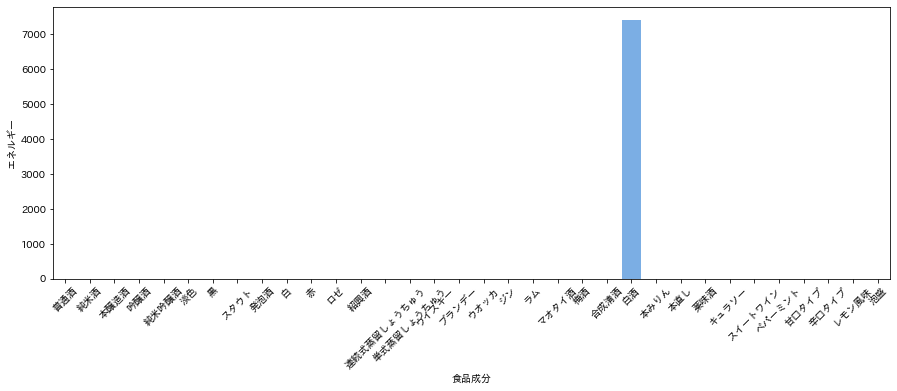

たんぱく質


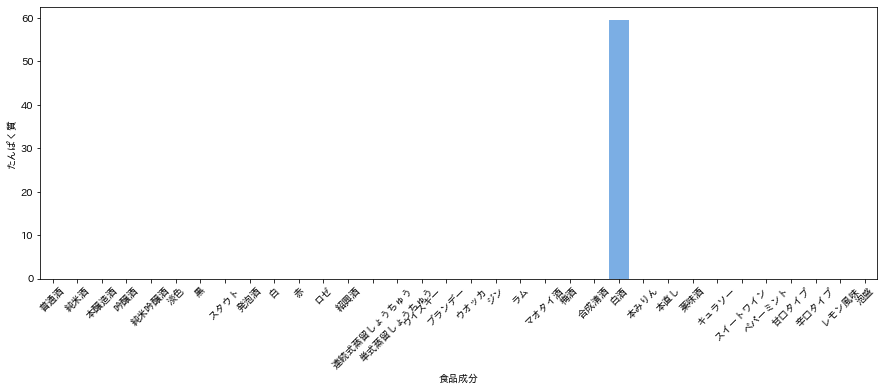

脂質


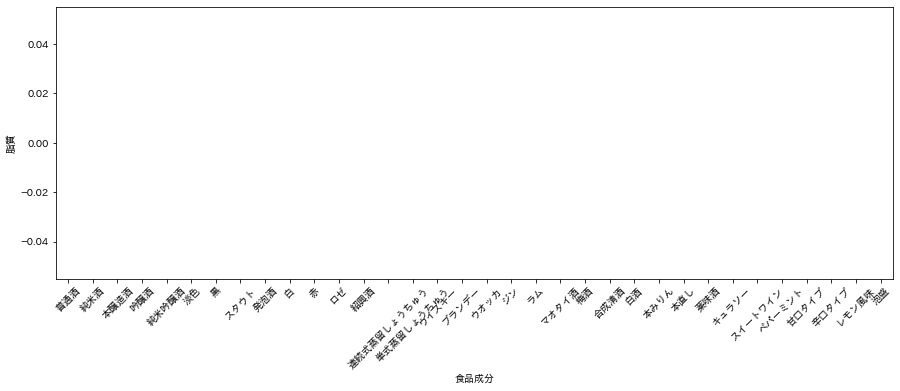

炭水化物


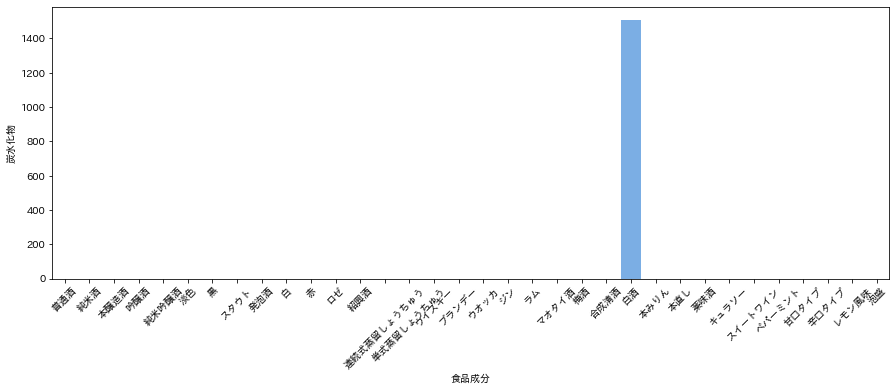

重量


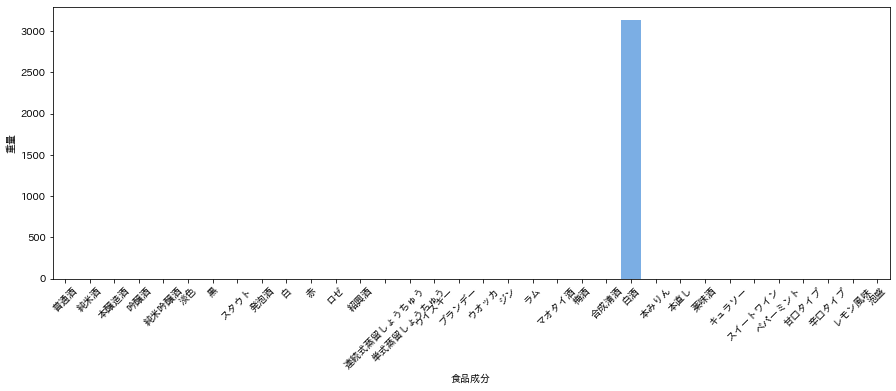

In [33]:
#サイズの設定
plt.rcParams['figure.figsize'] = (15 ,5)

#グラフの一括表示（繰り返し）
for i in df_alcohol_result.columns:
    #x軸に酒の種類，y軸に三大栄養素他
    sns.barplot(x=df_alcohol_result.index, y=i, data=df_alcohol_result)
    #x軸のフォントを45°回転
    plt.xticks(rotation=45)
    print(i)
    plt.show()